<a href="https://colab.research.google.com/github/JoanneBurke/NLP-Projects/blob/master/wri_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!pip install scikit-plot

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import scikitplot as skplt
import gensim
from datetime import timedelta
import os
from scipy import sparse
from prettytable import PrettyTable
import re
import pickle
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from keras.preprocessing.text import text_to_word_sequence

Using TensorFlow backend.


## EDA:

In [0]:
# changing the directory
os.chdir("./drive/My Drive/omdena_projects/environmental-conflict-tracker")

In [0]:
os.listdir('./data')

['gold-standard',
 'metadata',
 'policy',
 'reference',
 'texts',
 'urls',
 'missing_coref.csv',
 'wri_102919.csv',
 'wri_coref_110319.csv']

In [0]:
wri_coref_110319_df = pd.read_csv("./data/wri_coref_110319.csv")
wri_gs = pd.read_csv("./data/gold-standard/wri.csv")

In [0]:
wri_coref_110319_df.head()

,Unnamed: 0,class,text,text_coref,title
0,0,positive,Andhra Pradesh Chief Minister N Chandrababu Na...,Andhra Pradesh Chief Minister N Chandrababu Na...,Maoists using bauxite mining as pretext to kil...
1,1,negative,A 24-year-old woman was stabbed to death alleg...,A 24-year-old woman was stabbed to death alleg...,Youth kills woman for rejecting marriage proposal
2,2,negative,Road construction gathers pace in areas surrou...,Road construction gathers pace in areas surrou...,Road construction gathers pace in areas surrou...
3,3,negative,"Allu Arjun, one of the most crowd-pulling Sout...","Allu Arjun, one of the most crowd-pulling Sout...",Allu Arjun says 'Na Peru Parle Agro'
4,4,positive,"This story is from January 16, 2018\r\r\n\r\r\...","This story is from January 16, 2018\r\nBHOPAL:...","In Madhya Pradesh, even the dead talk"


In [0]:
wri_gs.head()

,Unnamed: 0,labels,text
0,0,negative,Agartala Tripura India January ANI Bharatiya ...
1,1,negative,A civil disobedience is underway in the suprem...
2,2,negative,By Lalit K JhaWashington Jan PTI The Trump ad...
3,3,positive,Rashtriya Swayamsevak Sangh chief Mohan Bhagwa...
4,4,negative,New Delhi Jan PTI A yearold doctor hailing fr...


In [0]:
wri_gs = wri_gs.rename(columns={"labels":"class"})

In [0]:
wri_gs.head()

,Unnamed: 0,class,text
0,0,negative,Agartala Tripura India January ANI Bharatiya ...
1,1,negative,A civil disobedience is underway in the suprem...
2,2,negative,By Lalit K JhaWashington Jan PTI The Trump ad...
3,3,positive,Rashtriya Swayamsevak Sangh chief Mohan Bhagwa...
4,4,negative,New Delhi Jan PTI A yearold doctor hailing fr...


In [0]:
wri_gs = wri_gs.drop(['Unnamed: 0'], axis=1)

In [0]:
wri_gs.head()

,class,text
0,negative,Agartala Tripura India January ANI Bharatiya ...
1,negative,A civil disobedience is underway in the suprem...
2,negative,By Lalit K JhaWashington Jan PTI The Trump ad...
3,positive,Rashtriya Swayamsevak Sangh chief Mohan Bhagwa...
4,negative,New Delhi Jan PTI A yearold doctor hailing fr...


In [0]:
wri_coref = wri_coref_110319_df[['class','text']]

In [0]:
wri_coref.head()

,class,text
0,positive,Andhra Pradesh Chief Minister N Chandrababu Na...
1,negative,A 24-year-old woman was stabbed to death alleg...
2,negative,Road construction gathers pace in areas surrou...
3,negative,"Allu Arjun, one of the most crowd-pulling Sout..."
4,positive,"This story is from January 16, 2018\r\r\n\r\r\..."


In [0]:
final_df = wri_gs.append(wri_coref, ignore_index=True)

In [0]:
final_df.head()

,class,text
0,negative,Agartala Tripura India January ANI Bharatiya ...
1,negative,A civil disobedience is underway in the suprem...
2,negative,By Lalit K JhaWashington Jan PTI The Trump ad...
3,positive,Rashtriya Swayamsevak Sangh chief Mohan Bhagwa...
4,negative,New Delhi Jan PTI A yearold doctor hailing fr...


In [0]:
final_df.to_csv("final_wri_gs_df.csv", index=False)

In [0]:
final_df.shape

(3503, 2)

In [0]:
wri_gs.shape[0] + wri_coref.shape[0]

3503

In [0]:
final_df['class'].unique()

array(['negative', 'positive'], dtype=object)

In [0]:
# seeing the duplicate rows 
final_df[final_df.duplicated(keep=False)]

,class,text
1514,positive,Elephants are used by armed forest rangers who...
1596,positive,Elephants are used by armed forest rangers who...
1724,negative,Road construction gathers pace in areas surrou...
1730,negative,Brasilia: Nine inmates have been killed and th...
1736,negative,"This story is from January 18, 2018\r\r\r\nJAI..."
...,...,...
3492,negative,"A minor rape survivor, unhappy over alleged po..."
3496,negative,"January 30, 2018 12:01 IST\r\r\r\nChief minist..."
3499,positive,Chinese troops intrude into Arunachal with roa...
3500,negative,Kochi: The BJP in Kerala on Saturday pressed f...


In [0]:
# lets drop the duplicated ones
final_df = final_df.drop_duplicates()
final_df.shape

(3142, 2)

In [0]:
# lets see whether all the duplicated rows are deleted
final_df[final_df.duplicated(keep=False)]

,class,text


* So all the duplicated rows are deleted.

## Vectorization:

In [0]:
for sent in final_df['text'].values[:50]:
    if len(re.findall('[?|!|\'|"|#]', sent)):
        print(sent)

A civil disobedience is underway in the supreme court of India. It’s unique The custodians of power are disobeying praying to the people’s court. It has flashed a rare spotlight on the court’s inner workings—for a dismayed people to see study and summate.Ordinarily judges shun the media speak only in court to lawyers and litigants and through their decisions. Not this time. Four senior judges abandoned the honoured code; they went public. What they alleged reveals disquiet in the office of the chief justice.This act will haunt India. It exposes divisions among judges doubts the practice of impartial justice and diminishes the court. Something is rotten; it needs a prompt incision. Else the decay may infect the democratic way of life we take for granted.The letter the said the unsaidIt all began with an undated letter. Jasti Chelameswar Ranjan Gogoi Madan Lokur and Kurian Joseph India’s four seniormost judges wrote to the only person senior to them chief justice Dipak Misra. They convey

In [0]:
for sent in final_df['text'].values[:10]:
    if len(re.findall('[.|,|)|(|\|/]', sent)):
        print(sent)

Agartala Tripura India January  ANI Bharatiya Janata Party President Amit Shah on Sunday launched an attack on the Communist Party of India Marxist CPIM in Tripura for spreading violence saying that the former cannot stop them from rising in the Leftruled state.Ahead of the Assembly elections in Tripura the BJP Chief while addressing a public rally here said I would like to tell the Manik government that the BJP will not cower down by violence. The more you spread the mud of violence the better will be the Lotus blossom.He added that more than seven lakh people out of the  lakh population of Tripura are registered in the unemployment list.The health facilities here are inadequate. This is what was done here in the past  years by the ruling state government. But not the countdown has begun. The BJP will form the government here in March. Even if the corrupt goes underground our party will dig the earth and bring them out Shah asserted.He further said that the Tripura government is not t

In [0]:
final_df.text[:3].values

array(['Agartala Tripura India January  ANI Bharatiya Janata Party President Amit Shah on Sunday launched an attack on the Communist Party of India Marxist CPIM in Tripura for spreading violence saying that the former cannot stop them from rising in the Leftruled state.Ahead of the Assembly elections in Tripura the BJP Chief while addressing a public rally here said I would like to tell the Manik government that the BJP will not cower down by violence. The more you spread the mud of violence the better will be the Lotus blossom.He added that more than seven lakh people out of the  lakh population of Tripura are registered in the unemployment list.The health facilities here are inadequate. This is what was done here in the past  years by the ruling state government. But not the countdown has begun. The BJP will form the government here in March. Even if the corrupt goes underground our party will dig the earth and bring them out Shah asserted.He further said that the Tripura government 

In [0]:
stopw = set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')
# lets remove words like not, very from stop words as they are meaninging in the reviews 
reqd_words = set(['only','very',"doesn't",'few','not'])
stopw = stopw - reqd_words

In [0]:
final_df['article_length'] = final_df.text.apply(lambda x: len(x))

In [0]:
(final_df['article_length'] < 2).sum()

0

In [0]:
def clean_text(article):
  
  cleaned_article = []
  cleaned_words_list = text_to_word_sequence(article)
  for word in cleaned_words_list:
    if word not in stopw and len(word) > 2:
      cleaned_article.append(snow.stem(word))
  return ' '.join(cleaned_article)

In [0]:
clean_text(final_df.text[0])

'agartala tripura india januari ani bharatiya janata parti presid amit shah sunday launch attack communist parti india marxist cpim tripura spread violenc say former cannot stop rise leftrul state ahead assembl elect tripura bjp chief address public ralli said would like tell manik govern bjp not cower violenc spread mud violenc better lotus blossom ad seven lakh peopl lakh popul tripura regist unemploy list health facil inadequ done past year rule state govern not countdown begun bjp form govern march even corrupt goe underground parti dig earth bring shah assert said tripura govern not take action culprit chit fund entir cabinet manik govern behind bar assembl elect state held march nagaland tripura two few state bjp not form govern current nagaland assembl naga peopl front npf hold major meanwhil tripura assembl communist parti india marxist enjoy major chief minist manik sarkar helm sinc ani'

In [0]:
final_df['stemmed_articles'] = final_df.text.apply(lambda x: clean_text(x))

In [0]:
final_df['stemmed_articles']

0       agartala tripura india januari ani bharatiya j...
1       civil disobedi underway suprem court india it ...
2       lalit jhawashington jan pti trump administr qu...
3       rashtriya swayamsevak sangh chief mohan bhagwa...
4       new delhi jan pti yearold doctor hail tamil na...
                              ...                        
3494    new delhi ahead releas protest padmaavat conti...
3495    clear not anim happi pose photograph one parti...
3497    gorakhpur rahul gandhi arriv first visit state...
3498    bengaluru bengaluruã¢ââ infam bellandur lake...
3502    aditi pinto unseason rain snowfal impact agric...
Name: stemmed_articles, Length: 3142, dtype: object

In [0]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3502
Data columns (total 4 columns):
class               3142 non-null object
text                3142 non-null object
article_length      3142 non-null int64
stemmed_articles    3142 non-null object
dtypes: int64(1), object(3)
memory usage: 202.7+ KB


In [0]:
# lets check now
for sent in final_df['stemmed_articles'].values:
    if len(re.findall('[.|,|)|(|\|/]', sent)):
        print(sent)

In [0]:
final_df.head()

,class,text,article_length,stemmed_articles
0,negative,Agartala Tripura India January ANI Bharatiya ...,1519,agartala tripura india januari ani bharatiya j...
1,negative,A civil disobedience is underway in the suprem...,9090,civil disobedi underway suprem court india it ...
2,negative,By Lalit K JhaWashington Jan PTI The Trump ad...,2064,lalit jhawashington jan pti trump administr qu...
3,positive,Rashtriya Swayamsevak Sangh chief Mohan Bhagwa...,2798,rashtriya swayamsevak sangh chief mohan bhagwa...
4,negative,New Delhi Jan PTI A yearold doctor hailing fr...,693,new delhi jan pti yearold doctor hail tamil na...


In [0]:
final_df['class'].value_counts(normalize=True)

negative    0.707829
positive    0.292171
Name: class, dtype: float64

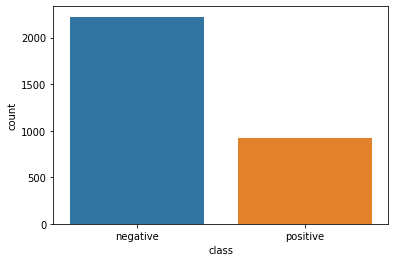

In [0]:
sns.countplot(final_df['class']);
plt.show()

In [0]:
0.80*3142

2513.6000000000004

In [0]:
final_df[:2513]['class'].value_counts(normalize=True)

negative    0.722244
positive    0.277756
Name: class, dtype: float64

In [0]:
final_df[2513:]['class'].value_counts(normalize=True)

negative    0.650238
positive    0.349762
Name: class, dtype: float64

In [0]:
train_df = final_df[:2513]
test_df = final_df[2513:]

## Featurization:

## BAG OF WORDS

### converting data into vectors using BOW unigram

In [0]:
count_vect = CountVectorizer(min_df=5)
unigram_xtrain_vect = count_vect.\
fit_transform(train_df.stemmed_articles)

unigram_xtest_vect = count_vect.transform(test_df.stemmed_articles)

In [0]:
print(unigram_xtrain_vect.shape, unigram_xtest_vect.shape)

(2513, 7817) (629, 7817)


In [0]:
count_vect.get_feature_names()

['000',
 '100',
 '103',
 '110',
 '120',
 '130',
 '13th',
 '140',
 '142',
 '144',
 '14th',
 '150',
 '151',
 '15th',
 '160',
 '163',
 '16th',
 '180',
 '1818',
 '1970s',
 '1980s',
 '1984',
 '1991',
 '1997',
 '1998',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '200th',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2022',
 '2030',
 '24x7',
 '250',
 '25th',
 '300',
 '305',
 '350',
 '390',
 '3rd',
 '400',
 '500',
 '600',
 '700',
 '750',
 '7th',
 '800',
 '8pm',
 '900',
 'aadhaar',
 'aadmi',
 'aai',
 'aam',
 'aap',
 'aayog',
 'abandon',
 'abba',
 'abdomen',
 'abduct',
 'abdul',
 'abdullah',
 'abe',
 'abet',
 'abhishek',
 'abhiyan',
 'abid',
 'abil',
 'abl',
 'ablaz',
 'aboard',
 'abolish',
 'abort',
 'about',
 'abraham',
 'abroad',
 'abscond',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'abu',
 'abund',
 'abus',
 'abut',
 'abvp',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access'

### converting data into vectors using BOW bigram

In [0]:
bigram_count_vect = CountVectorizer(ngram_range=(1,2), min_df=8, max_features=10000)
bigram_xtrain_vect = bigram_count_vect.\
fit_transform(train_df.stemmed_articles)

bigram_xtest_vect = bigram_count_vect.transform(test_df.stemmed_articles)

In [0]:
bigram_xtrain_vect.shape, bigram_xtest_vect.shape

((2513, 10000), (629, 10000))

In [0]:
bigram_count_vect.get_feature_names()[:15]

['000',
 '000 crore',
 '000 farmer',
 '000 peopl',
 '000 per',
 '100',
 '120',
 '130',
 '144',
 '150',
 '160',
 '180',
 '1818',
 '200',
 '200 year']

## TFIDF

### converting data into vectors using TF-IDF unigram

In [0]:
tfidf_uni = TfidfVectorizer(min_df=5, max_features=10000)
tfidf_uni_xtrain_vect = tfidf_uni.\
fit_transform(train_df.stemmed_articles)

tfidf_uni_xtest_vect = tfidf_uni.transform(test_df.stemmed_articles)

In [0]:
print(tfidf_uni_xtrain_vect.shape, tfidf_uni_xtest_vect.shape)

(2513, 7817) (629, 7817)


### converting data into vectors using TF-IDF bigram

In [0]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=10000)
tfidf_xtrain_vect = tfidf.\
fit_transform(train_df.stemmed_articles)

tfidf_xtest_vect = tfidf.transform(test_df.stemmed_articles)

In [0]:
print(tfidf_xtrain_vect.shape, tfidf_xtest_vect.shape)

(2513, 10000) (629, 10000)


### converting data into vectors using TF-IDF trigram

In [0]:
tfidf_tri = TfidfVectorizer(ngram_range=(1,3), min_df=5, max_features=10000)
tfidf_tri_xtrain_vect = tfidf_tri.\
fit_transform(train_df.stemmed_articles)

tfidf_tri_xtest_vect = tfidf_tri.transform(test_df.stemmed_articles)

In [0]:
print(tfidf_tri_xtrain_vect.shape, tfidf_tri_xtest_vect.shape)

(2513, 10000) (629, 10000)


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.calibration import CalibratedClassifierCV

## Applying Logistic regression on BOW unigram,

In [0]:
inverse_lambda = list(np.logspace(np.log(0.00005), np.log(10000), base = np.exp(1), num = 20))

In [0]:
final_df.head()

,class,text,article_length,stemmed_articles
0,negative,Agartala Tripura India January ANI Bharatiya ...,1519,agartala tripura india januari ani bharatiya j...
1,negative,A civil disobedience is underway in the suprem...,9090,civil disobedi underway suprem court india it ...
2,negative,By Lalit K JhaWashington Jan PTI The Trump ad...,2064,lalit jhawashington jan pti trump administr qu...
3,positive,Rashtriya Swayamsevak Sangh chief Mohan Bhagwa...,2798,rashtriya swayamsevak sangh chief mohan bhagwa...
4,negative,New Delhi Jan PTI A yearold doctor hailing fr...,693,new delhi jan pti yearold doctor hail tamil na...


In [0]:
final_df = final_df.rename(columns={'class':'class_label'})

In [0]:
final_df['class'] = final_df['class_label'].apply(lambda x: 1 if x == 'positive' else 0)

In [0]:
final_df.head()

,class_label,text,article_length,stemmed_articles,class
0,negative,Agartala Tripura India January ANI Bharatiya ...,1519,agartala tripura india januari ani bharatiya j...,0
1,negative,A civil disobedience is underway in the suprem...,9090,civil disobedi underway suprem court india it ...,0
2,negative,By Lalit K JhaWashington Jan PTI The Trump ad...,2064,lalit jhawashington jan pti trump administr qu...,0
3,positive,Rashtriya Swayamsevak Sangh chief Mohan Bhagwa...,2798,rashtriya swayamsevak sangh chief mohan bhagwa...,1
4,negative,New Delhi Jan PTI A yearold doctor hailing fr...,693,new delhi jan pti yearold doctor hail tamil na...,0


* Lets create a pipiline to test all the ml models and see which is performing best for our case.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [0]:
def best_model(x_train, y_train, x_test, y_test):
  pipe = Pipeline([('classifier' , RandomForestClassifier())])
  param_grid = [
                {'classifier' : [LogisticRegression()],
                 'classifier__penalty' : ['l1', 'l2'],
                 'classifier__C' : inverse_lambda,
                 'classifier__class_weight' : [None, 'balanced'],
                 'classifier__solver' : ['liblinear']},
                 {'classifier' : [RandomForestClassifier()],
                  'classifier__n_estimators' : list(range(10,300,10)),
                  'classifier__max_features' : list(range(6,32,5))}
                ]
  clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
  best_clf = clf.fit(x_train, y_train)
  print(f'best estimator is {clf.best_estimator_}')

  best_logreg_model = clf.best_params_['classifier']
  best_logreg_model.fit(x_train, y_train)

  unigram_predicts = best_logreg_model.predict(x_test)
  cv_cm = pd.crosstab(y_test, unigram_predicts, rownames=["True Label"], colnames=["predicted label"])
  print("confusion matrix on test data is:")
  print(cv_cm)
  print(" ")
  print("classification report on test data is")
  print(classification_report(y_true=y_test, y_pred=unigram_predicts))

  return best_logreg_model

In [0]:
import pickle

In [0]:
unigram_best_model = best_model(x_train=unigram_xtrain_vect, y_train=train_df['class'], x_test=unigram_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 630 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  7.8min finished


best estimator is Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.15636535271414095, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
confusion matrix on test data is:
predicted label  negative  positive
True Label                         
negative              407         2
positive               11       209
 
classification report on test data is
              precision    recall  f1-score   support

    negative       0.97      1.00      0.98       409
    positive       0.99      0.95      0.97       220

    accuracy     

In [0]:
filename = 'log_uni_model.sav'
pickle.dump(unigram_best_model, open(filename, 'wb'))

In [0]:
filename = 'count_vect_pickle.sav'
pickle.dump(count_vect, open(filename, 'wb'))

In [0]:
count_vect_loaded = pickle.load(open(filename, 'rb'))

In [0]:
count_vect_loaded.transform([final_df['stemmed_articles'][982]])

<1x7817 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [0]:
unigram_best_model.predict(count_vect.transform([final_df['stemmed_articles'][982]]))

array(['negative'], dtype=object)

In [0]:
os.getcwd()

'/content/drive/My Drive/omdena_projects/environmental-conflict-tracker'

## Now lets get the best model on bigrams Vectorizer

In [0]:
bigram_best_model = best_model(x_train=bigram_xtrain_vect, y_train=train_df['class'], x_test=bigram_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  8.1min finished


best estimator is Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=0.15636535271414095,
                                    class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
confusion matrix on test data is:
predicted label  negative  positive
True Label                         
negative              404         5
positive                4       216
 
classification report on test data is
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99       409
    positive       0.98      0

## Now lets get the best model on TFIDF unigram Vectorizer

In [0]:
tfidf_uni_best_model = best_model(x_train=tfidf_uni_xtrain_vect, y_train=train_df['class'], x_test=tfidf_uni_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 394 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  7.5min finished


best estimator is Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=23.912341624151296, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
confusion matrix on test data is:
predicted label  negative  positive
True Label                         
negative              406         3
positive                6       214
 
classification report on test data is
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99       409
    positive       0.99      0.97      0.98       220

    accuracy      

In [0]:
# saving the model and vectorizer
tfidf_uni_filename = 'log_tfidf_uni_model.sav'
pickle.dump(tfidf_uni_best_model, open(tfidf_uni_filename, 'wb'))

tfidf_uni_vectorizer_filename = 'tfidf_uni_pickle_vectorizer.sav'
pickle.dump(tfidf_uni, open(tfidf_uni_vectorizer_filename, 'wb'))

In [0]:
tfidf_uni_loaded = pickle.load(open('tfidf_uni_pickle_vectorizer.sav', 'rb'))

In [0]:
lod_mat = tfidf_uni_loaded.transform([final_df['stemmed_articles'][786]])
unload_mat = tfidf_uni.transform([final_df['stemmed_articles'][786]])

In [0]:
lod_mat

<1x7817 sparse matrix of type '<class 'numpy.float64'>'
	with 156 stored elements in Compressed Sparse Row format>

In [0]:
(lod_mat.toarray() == unload_mat.toarray()).sum()

7817

## Now lets get the best model on TFIDF bigrams Vectorizer

In [0]:
tfidf_best_model = best_model(x_train=tfidf_xtrain_vect, y_train=train_df['class'], x_test=tfidf_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 630 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  9.1min finished


best estimator is Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=23.912341624151296, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
confusion matrix on test data is:
predicted label  negative  positive
True Label                         
negative              406         3
positive                7       213
 
classification report on test data is
              precision    recall  f1-score   support

    negative       0.98      0.99      0.99       409
    positive       0.99      0.97      0.98       220

    accuracy      

## Now lets get the best model on TFIDF trigrams Vectorizer

In [0]:
tfidf_tri_best_model = best_model(x_train=tfidf_tri_xtrain_vect, y_train=train_df['class'], x_test=tfidf_tri_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 630 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  9.0min finished


best estimator is Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=23.912341624151296, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
confusion matrix on test data is:
predicted label  negative  positive
True Label                         
negative              406         3
positive                7       213
 
classification report on test data is
              precision    recall  f1-score   support

    negative       0.98      0.99      0.99       409
    positive       0.99      0.97      0.98       220

    accuracy      